## Isolation Forest Anomaly Detection

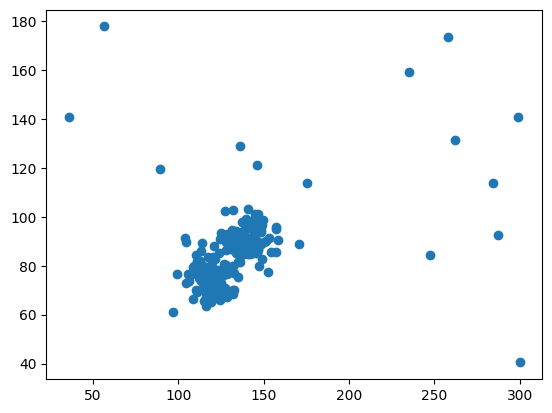

In [3]:
import pandas as pd
import numpy as np

np.random.seed(42)

# Cluster 1 (Normal)
cluster_1 = {
    "blood_pressure": np.random.normal(120, 8, 100),
    "heart_rate": np.random.normal(75, 6, 100)
}

# Cluster 2 (Normal)
cluster_2 = {
    "blood_pressure": np.random.normal(140, 8, 100),
    "heart_rate": np.random.normal(90, 6, 100)
}

# Anomalies (Extreme values)
anomalies = {
    "blood_pressure": np.random.uniform(20, 300, 15),
    "heart_rate": np.random.uniform(20, 200, 15)
}

# Combine all
df = pd.concat([
    pd.DataFrame(cluster_1),
    pd.DataFrame(cluster_2),
    pd.DataFrame(anomalies)
], ignore_index=True)

df.head()

import matplotlib.pyplot as plt
plt.scatter(df.iloc[:,0], df.iloc[:,1])

In [4]:
import pandas as pd
df.head()

,blood_pressure,heart_rate
0,123.973713,66.507776
1,118.893886,72.476128
2,125.181508,72.943713
3,132.184239,70.186336
4,118.126773,74.032286


In [5]:
from sklearn.ensemble import IsolationForest

In [6]:
clf = IsolationForest(contamination=0.2)
clf.fit(df)
predictions = clf.predict(df)

In [7]:
predictions

array([-1,  1,  1,  1,  1,  1,  1,  1,  1,  1, -1,  1,  1, -1, -1,  1,  1,
        1,  1,  1,  1,  1,  1, -1,  1,  1, -1,  1,  1,  1, -1,  1,  1,  1,
        1, -1,  1, -1,  1,  1,  1,  1, -1,  1,  1,  1,  1, -1,  1, -1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1, -1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1, -1,  1,  1,  1,  1, -1,  1,  1, -1,  1,  1,
        1,  1,  1,  1, -1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1, -1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1, -1,  1,  1, -1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1, -1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1, -1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1, -1,  1,  1,  1, -1,  1,  1,  1, -1,  1, -1,  1,  1,
        1,  1,  1,  1,  1,  1, -1,  1,  1, -1,  1,  1,  1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1])

In [8]:
import numpy as np
index = np.where(predictions < 0)
index

(array([  0,  10,  13,  14,  23,  26,  30,  35,  37,  42,  47,  49,  63,
         74,  79,  82,  89, 109, 120, 123, 134, 152, 174, 178, 182, 184,
        193, 196, 200, 201, 202, 203, 204, 205, 206, 207, 208, 209, 210,
        211, 212, 213, 214]),)

In [9]:
x=df.values

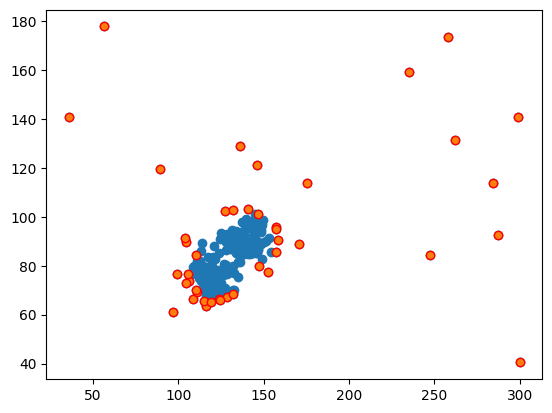

In [10]:
index = np.where(predictions < 0)
plt.scatter(df.iloc[:,0], df.iloc[:,1])
plt.scatter(x[index,0], x[index,1], edgecolors="r")

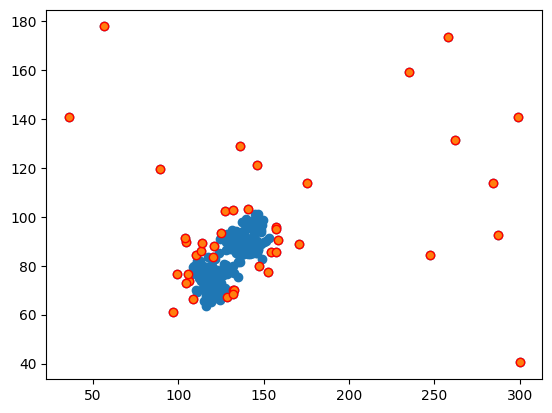

In [18]:
from sklearn.neighbors import LocalOutlierFactor
lof = LocalOutlierFactor(n_neighbors=20, contamination=0.2)
predictions = lof.fit_predict(df)
index = np.where(predictions < 0)
plt.scatter(df.iloc[:,0], df.iloc[:,1])
plt.scatter(x[index,0], x[index,1], edgecolors="r")

